# Evaluation

In [316]:
import pandas as pd
import numpy as np
from scipy import stats

In [317]:
queries_indexes_df = pd.read_pickle("./queries_indexes_df.pkl")

In [318]:
queries_indexes_df

,Query ID,Song ID,pitch_diff-ngram_5_set_index,UpSameDown-ngram_5_set_index,pitch_diff-ngram_8_set_index,UpSameDown-ngram_8_set_index,pitch_diff-ngram_10_set_index,UpSameDown-ngram_10_set_index,pitch_diff-ngram_12_set_index,UpSameDown-ngram_12_set_index,...,UpSameDown-ngram_12_set_hll_12_index,UpSameDown-ngram_12_set_hll_16_index,pitch_diff-multi_gram_5_10_set_hll_4_index,pitch_diff-multi_gram_5_10_set_hll_8_index,pitch_diff-multi_gram_5_10_set_hll_12_index,pitch_diff-multi_gram_5_10_set_hll_16_index,UpSameDown-multi_gram_5_10_set_hll_4_index,UpSameDown-multi_gram_5_10_set_hll_8_index,UpSameDown-multi_gram_5_10_set_hll_12_index,UpSameDown-multi_gram_5_10_set_hll_16_index
0,q1,1118,400,427,398,406,398,398,398,398,...,164,127,439,266,210,141,115,151,341,450
1,q2,1438,14,113,60,102,60,179,60,113,...,432,389,26,331,289,390,399,166,133,100
2,q3,1546,62,10,7,33,7,166,7,29,...,468,62,3,270,446,14,85,8,17,10
3,q4,1579,17,71,32,76,30,98,30,81,...,307,113,183,416,332,269,396,17,63,63
4,q5,1808,1,146,193,204,193,307,193,207,...,331,299,153,101,38,1,415,100,143,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,q114,479,1,69,283,21,283,45,283,257,...,8,410,23,77,39,6,140,77,16,29
114,q115,1747,211,93,205,61,205,180,205,250,...,205,432,181,198,52,139,145,269,108,67
115,q116,2024,228,460,210,314,210,185,210,245,...,307,105,195,250,328,381,90,423,444,443
116,q117,281,335,329,333,396,333,333,333,333,...,333,333,337,383,432,168,443,469,432,453


In [319]:
# non_vocals_song_ids = [1081,126,1212, 1536, 1655, 995,1786]

In [320]:
# queries_indexes_df[~queries_indexes_df['Song ID'].isin(non_vocals_song_ids)]

In [294]:
# load results from each experiment
# split queries in 10 sets
# calculate MRR for each set
# apply statistical tests t-test or Mann-Whitney 

# check memory usage in hll and sets representations
# apply statistical tests t-test or Mann-Whitney for memory usage

In [321]:
shuffled = queries_indexes_df.sample(frac=1, random_state=9283)
splits = np.array_split(shuffled, 10)  

In [322]:
for s in splits:
    print(f"size_split:{len(s)}")

size_split:12
size_split:12
size_split:11
size_split:11
size_split:11
size_split:11
size_split:11
size_split:11
size_split:11
size_split:11


In [297]:
def inverse(num):
    return 1.0/num

def get_mrr(rank_list):
    result = {}
    ranks = rank_list[np.logical_not(np.isnan(rank_list))]
    inverted_ranks = inverse(ranks)
    result["mrr"] = inverted_ranks.mean()
    result["count"] = len(inverted_ranks)
    return result


In [298]:
cols_indexes = list(queries_indexes_df.columns)
cols_indexes.remove('Song ID')
cols_indexes.remove('Query ID')

In [299]:
results = []
for index, split in enumerate(splits):
    for col_index in cols_indexes:
        mrr = get_mrr(split[col_index])
        results.append({"split":index,"col_index":col_index,"mrr":mrr['mrr']})
results_df = pd.DataFrame.from_records(results)

In [300]:
results_df

,split,col_index,mrr
0,0,pitch_diff-ngram_5_set_index,0.137593
1,0,UpSameDown-ngram_5_set_index,0.008553
2,0,pitch_diff-ngram_8_set_index,0.027153
3,0,UpSameDown-ngram_8_set_index,0.011316
4,0,pitch_diff-ngram_10_set_index,0.029648
...,...,...,...
495,9,pitch_diff-multi_gram_5_10_set_hll_16_index,0.009683
496,9,UpSameDown-multi_gram_5_10_set_hll_4_index,0.035734
497,9,UpSameDown-multi_gram_5_10_set_hll_8_index,0.011755
498,9,UpSameDown-multi_gram_5_10_set_hll_12_index,0.024068


In [301]:
def get_set_type(s):
    return s.split("_set_")[0]+""
results_df['set_type'] = results_df['col_index'].apply(get_set_type)

In [302]:
def get_similarity_methods_from_index(s:str):
    if("set_index" in s):
        return 'baseline'
    return s.split('_set_')[1].replace("_index","")

results_df['similarity_method'] = results_df['col_index'].apply(get_similarity_methods_from_index)

In [303]:
results_df.head()

,split,col_index,mrr,set_type,similarity_method
0,0,pitch_diff-ngram_5_set_index,0.137593,pitch_diff-ngram_5,baseline
1,0,UpSameDown-ngram_5_set_index,0.008553,UpSameDown-ngram_5,baseline
2,0,pitch_diff-ngram_8_set_index,0.027153,pitch_diff-ngram_8,baseline
3,0,UpSameDown-ngram_8_set_index,0.011316,UpSameDown-ngram_8,baseline
4,0,pitch_diff-ngram_10_set_index,0.029648,pitch_diff-ngram_10,baseline


In [304]:
results_df.pivot(columns='set_type', index=["split","similarity_method"], values='mrr')

set_type                 UpSameDown-multi_gram_5_10  UpSameDown-ngram_10  \
split similarity_method                                                    
0     baseline                             0.012246             0.008609   
      hll_12                               0.011658             0.009401   
      hll_16                               0.012046             0.012107   
      hll_4                                0.003357             0.008297   
      hll_8                                0.007343             0.021050   
1     baseline                             0.007893             0.020359   
      hll_12                               0.010253             0.022347   
      hll_16                               0.008417             0.020175   
      hll_4                                0.006543             0.005852   
      hll_8                                0.005379             0.006963   
2     baseline                             0.006730             0.007147   
      hll_12                               0.007743             0.006553   
      hll_16                               0.006590             0.007025   
      hll_4                                0.008400             0.005339   
      hll_8                                0.006110             0.008330   
3     baseline                             0.044005             0.016341   
      hll_12                               0.026610             0.011652   
      hll_16                               0.038000             0.016844   
      hll_4                                0.006087             0.011758   
      hll_8                                0.019597             0.024080   
4     baseline                             0.006262             0.007369   
      hll_12                               0.009102             0.006459   
      hll_16                               0.006414             0.008687   
      hll_4                                0.013071             0.007181   
      hll_8                                0.009492             0.006014   
5     baseline                             0.022672             0.005177   
      hll_12                               0.016187             0.003493   
      hll_16                               0.023281             0.003551   
      hll_4                                0.037049             0.013039   
      hll_8                                0.014021             0.008448   
6     baseline                             0.022747             0.057898   
      hll_12                               0.021229             0.049346   
      hll_16                               0.021645             0.055818   
      hll_4                                0.017044             0.018795   
      hll_8                                0.018973             0.011309   
7     baseline                             0.014731             0.013956   
      hll_12                               0.017745             0.015495   
      hll_16                               0.015871             0.016043   
      hll_4                                0.018631             0.015854   
      hll_8                                0.024135             0.013541   
8     baseline                             0.115945             0.103545   
      hll_12                               0.111622             0.051313   
      hll_16                               0.116061             0.098737   
      hll_4                                0.007240             0.011687   
      hll_8                                0.031142             0.018590   
9     baseline                             0.027077             0.019903   
      hll_12                               0.024068             0.016336   
      hll_16                               0.027901             0.018045   
      hll_4                                0.035734             0.009203   
      hll_8                                0.011755             0.006696   

set_type                 UpSameDown-ngram_12  U

In [327]:
results_df.pivot_table(columns='set_type', index=["similarity_method"], values='mrr',aggfunc='mean').transpose().sort_values(by='baseline', ascending=False)

similarity_method,baseline,hll_12,hll_16,hll_4,hll_8
set_type,,,,,
pitch_diff-ngram_5,0.141676,0.065766,0.144133,0.022431,0.011362
pitch_diff-multi_gram_5_10,0.134536,0.031296,0.074247,0.018156,0.016280
pitch_diff-ngram_8,0.036361,0.032898,0.024172,0.014829,0.013728
pitch_diff-ngram_10,0.035790,0.018179,0.029335,0.026130,0.023154
pitch_diff-ngram_12,0.035790,0.037635,0.029146,0.027959,0.014678
UpSameDown-multi_gram_5_10,0.028031,0.025622,0.027623,0.015316,0.014795
UpSameDown-ngram_10,0.026030,0.019239,0.025703,0.010700,0.012502
UpSameDown-ngram_8,0.025066,0.031535,0.024937,0.017932,0.014168
UpSameDown-ngram_12,0.024538,0.028325,0.024994,0.009732,0.016555


In [362]:
results_t_test = []
for g in list(results_df['set_type'].unique()):
    g_df = results_df[results_df["set_type"] == g]
    baseline_key = g+"_set_index"
    baseline_mmr = g_df[g_df['col_index']==baseline_key]['mrr'].tolist()
    for col_index in list(g_df['col_index'].unique()):
        if(col_index != baseline_key):
            col_index_mmr = g_df[g_df['col_index']==col_index]['mrr'].tolist()
            res = stats.ttest_rel(np.array(baseline_mmr),col_index_mmr, alternative='greater')
            mean_mrr = np.mean(col_index_mmr)
            mean_baseline_mrr = np.mean(baseline_mmr)
            results_t_test.append({'p_value':res.pvalue,
                                    'set_type':g,
                                   'similarity_method': get_similarity_methods_from_index(col_index),
                                   'col_index':col_index,
                                   'mean_mrr':mean_mrr,
                                   'mean_baseline_mrr':mean_baseline_mrr})
results_t_test_df = pd.DataFrame.from_records(results_t_test)
results_t_test_df['reject_nh'] = results_t_test_df['p_value']<=0.05
results_t_test_df.sort_values(by=["mean_baseline_mrr", "mean_mrr"], ascending=False)

,p_value,set_type,similarity_method,col_index,mean_mrr,mean_baseline_mrr,reject_nh
3,0.567506,pitch_diff-ngram_5,hll_16,pitch_diff-ngram_5_set_hll_16_index,0.144133,0.141676,False
2,0.013417,pitch_diff-ngram_5,hll_12,pitch_diff-ngram_5_set_hll_12_index,0.065766,0.141676,True
0,0.002757,pitch_diff-ngram_5,hll_4,pitch_diff-ngram_5_set_hll_4_index,0.022431,0.141676,True
1,0.000936,pitch_diff-ngram_5,hll_8,pitch_diff-ngram_5_set_hll_8_index,0.011362,0.141676,True
35,0.002279,pitch_diff-multi_gram_5_10,hll_16,pitch_diff-multi_gram_5_10_set_hll_16_index,0.074247,0.134536,True
34,0.004979,pitch_diff-multi_gram_5_10,hll_12,pitch_diff-multi_gram_5_10_set_hll_12_index,0.031296,0.134536,True
32,0.000942,pitch_diff-multi_gram_5_10,hll_4,pitch_diff-multi_gram_5_10_set_hll_4_index,0.018156,0.134536,True
33,0.001272,pitch_diff-multi_gram_5_10,hll_8,pitch_diff-multi_gram_5_10_set_hll_8_index,0.016280,0.134536,True
10,0.399318,pitch_diff-ngram_8,hll_12,pitch_diff-ngram_8_set_hll_12_index,0.032898,0.036361,False
11,0.005777,pitch_diff-ngram_8,hll_16,pitch_diff-ngram_8_set_hll_16_index,0.024172,0.036361,True


In [306]:
df = results_df.groupby(["similarity_method","set_type"])["mrr"].mean().to_frame().reset_index().sort_values(by=["similarity_method","set_type"])

<Axes: xlabel='mrr', ylabel='set_type'>

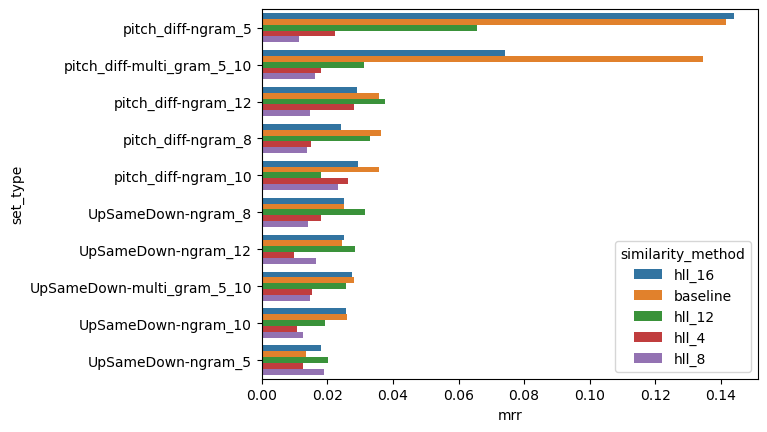

In [323]:
import seaborn as sns
sns.barplot(data=df.sort_values(by=["mrr"], ascending=False), y='set_type', x='mrr', hue='similarity_method')

## Analysing HLL estimation

In [364]:
cross_df = pd.read_pickle("./checkpoint/similarity_UpSameDown-multi_gram_5_10_set_hll_16.pkl")

<Axes: xlabel='similarity_pitch_diff-ngram_5_set_baseline', ylabel='similarity_pitch_diff-ngram_5_set_hll_16'>

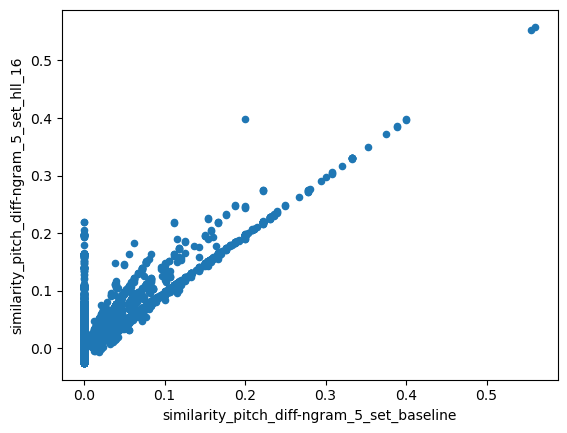

In [371]:
cross_df.plot.scatter(x='similarity_pitch_diff-ngram_5_set_baseline',y='similarity_pitch_diff-ngram_5_set_hll_16')

## Memory Analysis

In [308]:
from pympler import asizeof

In [309]:
queries_sets_hll_df = pd.read_pickle("./queries_set_hll.pkl")
songs_sets_hll_df = pd.read_pickle("./songs_set_hll.pkl")

In [310]:
queries_sets_hll_df.head()

,Query ID,Song ID,pitch_diff-ngram_5_set,UpSameDown-ngram_5_set,pitch_diff-ngram_8_set,UpSameDown-ngram_8_set,pitch_diff-ngram_10_set,UpSameDown-ngram_10_set,pitch_diff-ngram_12_set,UpSameDown-ngram_12_set,...,pitch_diff-ngram_5_set_hll_16,UpSameDown-ngram_5_set_hll_16,pitch_diff-ngram_8_set_hll_16,UpSameDown-ngram_8_set_hll_16,pitch_diff-ngram_10_set_hll_16,UpSameDown-ngram_10_set_hll_16,pitch_diff-ngram_12_set_hll_16,UpSameDown-ngram_12_set_hll_16,pitch_diff-multi_gram_5_10_set_hll_16,UpSameDown-multi_gram_5_10_set_hll_16
0,q1,1118,"{(2, 0, -2, 5, -1), (0, -2, 5, -1, 0), (-2, -3...","{('S', 'D', 'U', 'D', 'S'), ('D', 'S', 'D', 'D...","{(5, -1, 0, -2, -2, -3, 0, 3), (0, -2, 5, -1, ...","{('S', 'D', 'D', 'D', 'S', 'U', 'U', 'U'), ('D...","{(5, -1, 0, -2, -2, -3, 0, 3, 2, 3), (-2, 5, -...","{('U', 'D', 'S', 'D', 'D', 'D', 'S', 'U', 'U',...","{(0, -2, 5, -1, 0, -2, -2, -3, 0, 3, 2, 3), (2...","{('S', 'D', 'U', 'D', 'S', 'D', 'D', 'D', 'S',...",...,<hyperloglog.hll.HyperLogLog object at 0x298cb...,<hyperloglog.hll.HyperLogLog object at 0x298d0...,<hyperloglog.hll.HyperLogLog object at 0x2988b...,<hyperloglog.hll.HyperLogLog object at 0x298b3...,<hyperloglog.hll.HyperLogLog object at 0x298c2...,<hyperloglog.hll.HyperLogLog object at 0x298c1...,<hyperloglog.hll.HyperLogLog object at 0x2988a...,<hyperloglog.hll.HyperLogLog object at 0x29889...,<hyperloglog.hll.HyperLogLog object at 0x29880...,<hyperloglog.hll.HyperLogLog object at 0x29883...
1,q2,1438,"{(-6, -2, -2, -2, 0), (6, -6, -2, -2, -2), (-2...","{('D', 'D', 'S', 'U', 'D'), ('D', 'D', 'D', 'D...","{(-5, 1, -1, -2, 10, 2, -2, -4), (-1, -2, 10, ...","{('U', 'D', 'U', 'D', 'D', 'U', 'U', 'D'), ('D...","{(-2, 10, 2, -2, -4, -2, 2, 6, -6, -2), (-2, -...","{('D', 'U', 'U', 'D', 'D', 'D', 'U', 'U', 'D',...","{(10, 2, -2, -4, -2, 2, 6, -6, -2, -2, -2, 0),...","{('D', 'D', 'U', 'U', 'D', 'D', 'D', 'U', 'U',...",...,<hyperloglog.hll.HyperLogLog object at 0x298cb...,<hyperloglog.hll.HyperLogLog object at 0x298d1...,<hyperloglog.hll.HyperLogLog object at 0x2988b...,<hyperloglog.hll.HyperLogLog object at 0x298b3...,<hyperloglog.hll.HyperLogLog object at 0x298c2...,<hyperloglog.hll.HyperLogLog object at 0x298c1...,<hyperloglog.hll.HyperLogLog object at 0x2988a...,<hyperloglog.hll.HyperLogLog object at 0x29889...,<hyperloglog.hll.HyperLogLog object at 0x29880...,<hyperloglog.hll.HyperLogLog object at 0x29883...
2,q3,1546,"{(2, -2, -1, -2, 2), (-2, -1, -2, 2, 1), (-2, ...","{('U', 'S', 'U', 'U', 'D'), ('S', 'D', 'U', 'U...","{(1, -1, -2, 2, 0, 1, 2, -2), (-2, 2, -2, -1, ...","{('U', 'D', 'S', 'D', 'U', 'U', 'D', 'D'), ('D...","{(-1, -2, 0, 5, -2, 2, -2, -1, -2, 2), (3, 0, ...","{('S', 'D', 'D', 'D', 'S', 'U', 'D', 'U', 'D',...","{(-1, -2, 3, 3, 0, -3, -1, -2, 0, 5, -2, 2), (...","{('D', 'D', 'D', 'D', 'S', 'U', 'U', 'D', 'D',...",...,<hyperloglog.hll.HyperLogLog object at 0x298cb...,<hyperloglog.hll.HyperLogLog object at 0x298d1...,<hyperloglog.hll.HyperLogLog object at 0x2988b...,<hyperloglog.hll.HyperLogLog object at 0x298b3...,<hyperloglog.hll.HyperLogLog object at 0x298c2...,<hyperloglog.hll.HyperLogLog object at 0x298c1...,<hyperloglog.hll.HyperLogLog object at 0x2988a...,<hyperloglog.hll.HyperLogLog object at 0x29889...,<hyperloglog.hll.HyperLogLog object at 0x29880...,<hyperloglog.hll.HyperLogLog object at 0x29883...
3,q4,1579,"{(-8, 2, 1, -7, 10), (-1, 2, 0, -2, -1), (-2, ...","{('U', 'U', 'D', 'D', 'U'), ('S', 'D', 'U', 'D...","{(-1, 2, 0, -2, -1, 3, -2, -1), (-7, 10, -1, -...","{('D', 'U', 'D', 'D', 'U', 'U', 'D', 'U'), ('D...","{(-1, -3, -1, -5, 3, 4, -1, -2, 2, 2), (3, 4, ...","{('D', 'U', 'D', 'U', 'U', 'D', 'U', 'D', 'D',...","{(0, -2, -1, 3, -2, -1, -2, 3, -1, -2, 3, 2), ...","{('S', 'D', 'U', 'D', 'D', 'U', 'D', 'U', 'S',...",...,<hyperloglog.hll.HyperLogLog object at 0x298cb...,<hyperloglog.hll.HyperLogLog object at 0x298d1...,<hyperloglog.hll.HyperLogLog object at 0x2988b...,<hyperloglog.hll.HyperLogLog object at 0x298b3...,<hyperloglog.hll.HyperLogLog object at 0x298c2...,

In [311]:
columns_queries = queries_sets_hll_df.columns.tolist()
columns_queries.remove('Song ID')
columns_queries.remove('Query ID')
columns_queries
cols_series_size = []
query_memory_df = queries_sets_hll_df.copy()
cols_series_size.append(query_memory_df['Query ID'])
for c in columns_queries:
    size_col = c+"_size"
    s = query_memory_df[c].apply(lambda x: asizeof.asizeof(x))
    cols_series_size.append(s)
query_memory_df = pd.concat(cols_series_size, axis=1)

In [372]:
query_memory_mean_df = query_memory_df.describe().transpose().sort_values(by="mean")
query_memory_mean_df

,count,mean,std,min,25%,50%,75%,max
pitch_diff-ngram_12_set_hll_4,112.0,477.714286,42.242421,368.0,464.0,496.0,496.0,560.0
UpSameDown-ngram_12_set_hll_4,112.0,478.857143,43.789599,368.0,464.0,496.0,496.0,560.0
UpSameDown-ngram_8_set_hll_4,112.0,484.000000,36.731311,400.0,464.0,496.0,496.0,560.0
UpSameDown-ngram_10_set_hll_4,112.0,484.571429,40.031905,368.0,464.0,496.0,496.0,560.0
pitch_diff-ngram_10_set_hll_4,112.0,486.000000,39.841126,368.0,464.0,496.0,496.0,560.0
pitch_diff-ngram_8_set_hll_4,112.0,488.571429,33.543226,400.0,464.0,496.0,496.0,592.0
pitch_diff-ngram_5_set_hll_4,112.0,496.285714,31.998713,432.0,496.0,496.0,496.0,592.0
UpSameDown-ngram_5_set_hll_4,112.0,502.857143,37.796720,432.0,496.0,496.0,528.0,592.0
pitch_diff-multi_gram_5_10_set_hll_4,112.0,508.571429,34.725621,432.0,496.0,496.0,528.0,592.0
UpSameDown-multi_gram_5_10_set_hll_4,112.0,523.428571,32.388885,432.0,496.0,528.0,536.0,624.0


In [379]:
baseline_memory_mean_df = query_memory_mean_df[query_memory_mean_df.index.str.endswith("_set")].copy()
baseline_memory_mean_df["equivalent_code"] = baseline_memory_mean_df.index.str.replace("_set","")
baseline_memory_mean_df

,count,mean,std,min,25%,50%,75%,max,equivalent_code
UpSameDown-ngram_5_set,112.0,3408.714286,1545.007953,1128.0,1908.0,3984.0,4604.0,7224.0,UpSameDown-ngram_5
pitch_diff-ngram_12_set,112.0,3647.857143,2583.594642,216.0,1782.0,4064.0,5048.0,17496.0,pitch_diff-ngram_12
pitch_diff-ngram_10_set,112.0,3801.071429,2426.420222,216.0,1872.0,4112.0,4992.0,16944.0,pitch_diff-ngram_10
pitch_diff-ngram_8_set,112.0,3816.071429,2254.982966,376.0,1928.0,4104.0,4904.0,16328.0,pitch_diff-ngram_8
UpSameDown-ngram_12_set,112.0,4000.714286,2850.047964,216.0,1960.0,4392.0,5512.0,19048.0,UpSameDown-ngram_12
pitch_diff-ngram_5_set,112.0,4067.642857,2341.408250,1088.0,2022.0,4100.0,4856.0,15440.0,pitch_diff-ngram_5
UpSameDown-ngram_8_set,112.0,4139.428571,2465.664984,408.0,2144.0,4376.0,5336.0,17720.0,UpSameDown-ngram_8
UpSameDown-ngram_10_set,112.0,4163.928571,2680.167266,216.0,2080.0,4448.0,5488.0,18496.0,UpSameDown-ngram_10
UpSameDown-multi_gram_5_10_set,112.0,21361.142857,13587.556697,2000.0,16162.0,20480.0,25422.0,81080.0,UpSameDown-multi_gram_5_10
pitch_diff-multi_gram_5_10_set,112.0,21539.428571,14980.636870,1856.0,15640.0,19404.0,24110.0,79368.0,pitch_diff-multi_gram_5_10


In [387]:
query_memory_mean_df["equivalent_code"] = query_memory_mean_df.index.str.split("_set_").str[0]
pd.merge(query_memory_mean_df.reset_index()[["index","mean","equivalent_code"]], baseline_memory_mean_df[["equivalent_code","mean"]], on='equivalent_code', suffixes=('', '_baseline'), how='left')

,index,mean,equivalent_code,mean_baseline
0,pitch_diff-ngram_12_set_hll_4,477.714286,pitch_diff-ngram_12,3647.857143
1,UpSameDown-ngram_12_set_hll_4,478.857143,UpSameDown-ngram_12,4000.714286
2,UpSameDown-ngram_8_set_hll_4,484.000000,UpSameDown-ngram_8,4139.428571
3,UpSameDown-ngram_10_set_hll_4,484.571429,UpSameDown-ngram_10,4163.928571
4,pitch_diff-ngram_10_set_hll_4,486.000000,pitch_diff-ngram_10,3801.071429
5,pitch_diff-ngram_8_set_hll_4,488.571429,pitch_diff-ngram_8,3816.071429
6,pitch_diff-ngram_5_set_hll_4,496.285714,pitch_diff-ngram_5,4067.642857
7,UpSameDown-ngram_5_set_hll_4,502.857143,UpSameDown-ngram_5,3408.714286
8,pitch_diff-multi_gram_5_10_set_hll_4,508.571429,pitch_diff-multi_gram_5_10,21539.428571
9,UpSameDown-multi_gram_5_10_set_hll_4,523.428571,UpSameDown-multi_gram_5_10,21361.142857


In [313]:
query_memory_df

,Query ID,pitch_diff-ngram_5_set,UpSameDown-ngram_5_set,pitch_diff-ngram_8_set,UpSameDown-ngram_8_set,pitch_diff-ngram_10_set,UpSameDown-ngram_10_set,pitch_diff-ngram_12_set,UpSameDown-ngram_12_set,pitch_diff-multi_gram_5_10_set,...,pitch_diff-ngram_5_set_hll_16,UpSameDown-ngram_5_set_hll_16,pitch_diff-ngram_8_set_hll_16,UpSameDown-ngram_8_set_hll_16,pitch_diff-ngram_10_set_hll_16,UpSameDown-ngram_10_set_hll_16,pitch_diff-ngram_12_set_hll_16,UpSameDown-ngram_12_set_hll_16,pitch_diff-multi_gram_5_10_set_hll_16,UpSameDown-multi_gram_5_10_set_hll_16
0,q1,1376,1448,1208,1304,568,632,408,440,5304,...,576368,576432,576368,576368,576368,576368,576304,576336,576464,576464
1,q2,1808,1688,1688,1880,1608,1768,1496,1624,8200,...,576464,576400,576368,576432,576368,576368,576336,576368,576496,576496
2,q3,5288,5064,5384,6008,5520,6112,5624,6184,27104,...,576464,576464,576464,576464,576432,576464,576432,576496,576560,576528
3,q4,5360,4744,5464,6104,5608,6216,5720,6296,27736,...,576464,576496,576464,576464,576432,576432,576464,576464,576528,576560
4,q5,4776,4664,4824,5336,4904,5384,4944,5400,23688,...,576432,576464,576432,576432,576464,576432,576432,576432,576464,576560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,q114,4856,4584,4904,5240,4992,5488,5016,5512,24072,...,576496,576432,576464,576464,576464,576400,576400,576432,576592,576560
114,q115,4424,2008,4424,4184,4464,4552,4472,4728,21312,...,576432,576432,576432,576368,576432,576432,576432,576432,576496,576496
115,q116,3992,4104,3944,4280,3936,4240,2360,2632,18480,...,576432,576464,576432,576400,576432,576432,576432,576400,576496,576496
116,q117,1088,1128,376,408,216,216,216,216,1864,...,576336,576368,576336,576336,576272,576272,576272,576272,576400,576432


In [314]:
memory_splits = []
for s in splits:
    mem_split_df = s[["Query ID"]].merge(query_memory_df)
    memory_avg = mem_split_df
    memory_splits.append(s[["Query ID"]].merge(query_memory_df))

In [315]:
memory_splits[0]

,Query ID,pitch_diff-ngram_5_set,UpSameDown-ngram_5_set,pitch_diff-ngram_8_set,UpSameDown-ngram_8_set,pitch_diff-ngram_10_set,UpSameDown-ngram_10_set,pitch_diff-ngram_12_set,UpSameDown-ngram_12_set,pitch_diff-multi_gram_5_10_set,...,pitch_diff-ngram_5_set_hll_16,UpSameDown-ngram_5_set_hll_16,pitch_diff-ngram_8_set_hll_16,UpSameDown-ngram_8_set_hll_16,pitch_diff-ngram_10_set_hll_16,UpSameDown-ngram_10_set_hll_16,pitch_diff-ngram_12_set_hll_16,UpSameDown-ngram_12_set_hll_16,pitch_diff-multi_gram_5_10_set_hll_16,UpSameDown-multi_gram_5_10_set_hll_16
0,q23,1376,1448,1208,1304,568,632,408,440,5272,...,576496,576400,576400,576368,576336,576368,576336,576336,576496,576432
1,q56,2024,2088,1928,2168,1872,2080,1784,1960,15672,...,576432,576400,576400,576432,576464,576368,576368,576400,576496,576496
2,q98,4424,4664,4464,4856,4496,4864,4488,4840,21568,...,576432,576464,576496,576400,576400,576496,576432,576400,576528,576528
3,q49,4280,4424,4264,4664,4288,4656,4280,4616,20440,...,576432,576432,576400,576432,576400,576368,576432,576400,576528,576528
4,q48,4688,4744,4744,5240,4808,5280,4792,5288,23200,...,576464,576496,576432,576400,576496,576432,576400,576432,576560,576528
5,q81,7304,4664,7624,7736,7984,8712,8312,9208,64888,...,576464,576432,576464,576432,576496,576432,576496,576464,576624,576496
6,q78,4392,2168,4424,4856,4464,4864,4464,4840,21280,...,576496,576432,576496,576432,576464,576400,576432,576464,576560,576528
7,q85,2024,1688,1928,2168,1872,2080,1784,1960,15776,...,576432,576432,576464,576432,576400,576336,576400,576400,576528,576528
8,q8,4928,4584,4984,5528,5080,5592,5144,5624,24720,...,576496,576464,576432,576464,576400,576432,576464,576464,576560,576592
9,q102,5792,4664,5944,6104,6136,6528,6296,6856,30384,...,576528,576432,576432,576464,576464,576432,576432,576464,576624,576624


# Sequences Analysis

In [328]:
queries_sequence_df = pd.read_pickle("./queries_sequence_df.pkl")
songs_sequence_df = pd.read_pickle("./songs_sequence_df.pkl")

count    3930.000000
mean       -0.008906
std         3.027182
min       -19.000000
25%        -2.000000
50%         0.000000
75%         2.000000
max        19.000000
dtype: float64

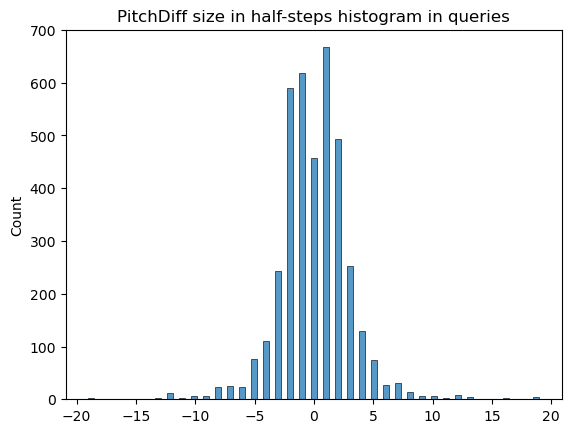

In [352]:
diff_half_steps = queries_sequence_df['pitch_diff'].explode().tolist()
sns.histplot(diff_half_steps).set(title='PitchDiff size in half-steps histogram in queries')
pd.Series(diff_half_steps).describe()

In [356]:
len(list(filter(lambda x: x>=-5 and x<=5,diff_half_steps)))/len(diff_half_steps)

0.94529262086514

count    125279.000000
mean          0.006960
std           7.649753
min         -61.000000
25%          -3.000000
50%           0.000000
75%           3.000000
max          63.000000
dtype: float64

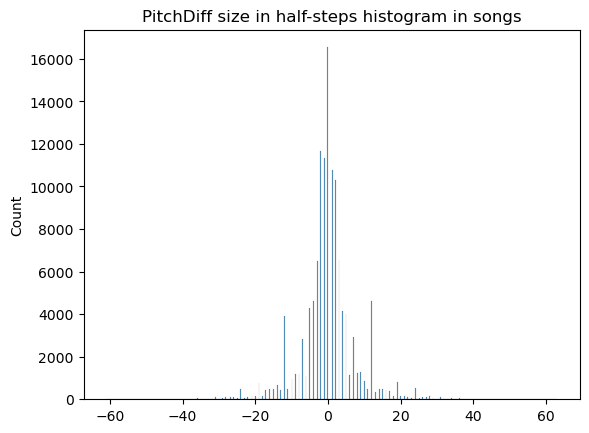

In [353]:
diff_half_steps_songs = songs_sequence_df['pitch_diff'].explode().tolist()
sns.histplot(diff_half_steps_songs).set(title='PitchDiff size in half-steps histogram in songs')
pd.Series(diff_half_steps_songs).describe()

In [357]:
len(list(filter(lambda x: x>=-5 and x<=5,diff_half_steps_songs)))/len(diff_half_steps_songs)

0.7247423750189577